## **Working with Linear Regression**

## Step 1: Data Preparation

- Import the required libraries
- Load the Boston housing data set
- Prepare the data set


dataset: https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import fetch_openml
# https://www.openml.org/search?type=data&sort=runs&status=active

from sklearn.datasets import load_boston

In [23]:


# Load the Boston dataset
## boston = fetch_openml(name='boston', version=1, as_frame=True, parser='auto')
#boston = fetch_openml(name='boston', version=1, as_frame=True)

boston = load_boston()

data = boston.data
target = boston.target
feature_names = boston.feature_names

## Step 2: Create a DataFrame and Check for Missing Values

- Create a DataFrame using the Boston housing data
- Display basic statistics
- Check for missing values


In [24]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


__Observation__:

- This is the head of the data set.

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


__Observation__:
- Here, you can see the statistical analysis of the data set.

In [26]:
df.isna().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
HousePrice    0
dtype: int64

__Observation__:

- There are no empty rows in the dataset.

## Step 3: Remove Outliers from the HousePrice Column


- Use a boxplot to visualize the outliers
- Remove outliers from the __HousePrice__ column using the 1% and 99% quantiles


/Users/oysterable/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HousePrice'>

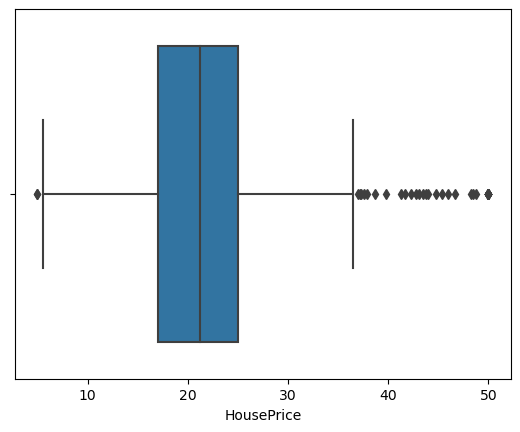

In [27]:
sns.boxplot(df['HousePrice'])

__Observation__:

- There are outliers in the data set.

In [28]:
upper_limit = df['HousePrice'].quantile(0.99)
lower_limit = df['HousePrice'].quantile(0.01)

In [29]:
upper_limit

50.0

In [30]:
lower_limit

7.01

In [31]:
df['HousePrice'] = np.where(df['HousePrice'] < lower_limit, lower_limit, df['HousePrice'])
df['HousePrice'] = np.where(df['HousePrice'] > upper_limit, upper_limit, df['HousePrice'])

## Step 4: Test for Linearity of the Model

- Fit the model and display the summary
- Define functions to calculate residuals and plot actual vs. predicted values
- Test for linearity


In [34]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

boston.data = boston.data.apply(pd.to_numeric)

# X_constant = sm.add_constant(np.asarray(boston.data))
X_constant = sm.add_constant(boston.data)

# X_constant is the constant of the model (b)
# y = mX+b
# It will add 1 to each value in the dataset.

# boston_model = sm.OLS(boston.target, np.asarray(boston.data)).fit()
boston_model = sm.OLS(boston.target, X_constant).fit()
boston_model.summary()

ImportError: cannot import name 'Int64Index' from 'pandas' (/Users/oysterable/anaconda3/lib/python3.8/site-packages/pandas/__init__.py)

In [ ]:
## The independent variables:
# CRIM          0
# ZN            0
# INDUS         0
# CHAS          0
# NOX           0
# RM            0
# AGE           0
# DIS           0
# RAD           0
# TAX           0
# PTRATIO       0
# B             0
# LSTAT         0

## The dependent variable:
# HousePrice    0

## The model
# y = coef+ax1+bx2+cx3+dx4+ex5+...nx13

# the weights of the model represent the importance, influence, or correlation of the independent variables


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] 

- Define a function to calculate residual values by taking the actual and predicted values
- The value of residuals is equal to the difference between the actual and  predicted values.  

In [ ]:
def calculate_residuals(model, features, label):
    predictions =  model.predict(features)
    df_results = pd.DataFrame({'Actual' : label, 'Predicted' : predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

: 

- Next, define a function to plot the actual and predicted values using __lmplot__.
- The orange line will show the fitted line created by the linear regression model.

In [ ]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)

    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

: 

- Now, run the function __linear_assumptions__ to show the graph with the model as __boston_model__, features as __boston.data__, and label as __boston.taget__ variables as arguments.

In [ ]:
X_constant = sm.add_constant(np.asarray(boston.data))

In [ ]:
# linear_assumptions(boston_model, boston.data, boston.target)
linear_assumptions(boston_model, X_constant, boston.target)

: 

__Observation__:

- We can observe that the line does not represent all the data points.

## Step 5: Check for Multicollinearity

- Let's check the correlation between the variables in the data set.



In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

: 

- Calculate the variance inflation factor (VIF) for each feature
- Import the __variance_inflation_factor__ module from the __statsmodels.stats.outliers_influence__ library
- Set the features as the DataFrame, except the target variable
- Assign the __vif_data__ to the feature columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

x = df.drop(['HousePrice'], axis=1)
x = x.astype(float)  # Convert the array to float type

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns

vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

: 

__Observation__:
- From the above output, we can infer that the columns **NOX, RM, AGE,** and **PTRATIO** have higher multicollinearity. Hence, we can drop them. 

## Step 6: Remove Multicollinear Features and Split the Data set

- Remove highly multicollinear features from the data set


In [ ]:
df1 = df.drop(['NOX', 'RM', 'AGE', 'PTRATIO'], axis = 1)

: 

- Now, set the feature and target variables.

In [ ]:
x = df1.drop(['HousePrice'], axis =1) #features
y = df1['HousePrice'] #target

: 

- Next, split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data
X_train, X_test, y_train, y_test  = train_test_split(x, y, random_state=0, test_size=0.25)

: 


## Step 7: Fit the Model and Evaluate Performance

- Fit the model using OLS and display the summary.


In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.dtype)
print(y_train.dtype)
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

: 

We did not included a coefficient terms so the R2 might not be as accurate as expected

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

: 

- Now, fit the model using linear regression.


In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

X_test = pd.DataFrame(X_test)  # Convert X_test to a pandas DataFrame
X_test = X_test.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
X_test = np.asarray(X_test)  # Convert X_test to a numpy array

y_pred_test = reg.predict(X_test)  # Predict using the trained model

: 

- Evaluate the model using various metrics such as the **r2_score, mean_absolute_error, and mean_squared_error**

Values for Train data:

In [ ]:
print("R Square: {}".format(r2_score(y_train, y_pred_train)))
#the higher the value the better (close to 1)

print("MAE: {}".format(mean_absolute_error(y_train, y_pred_train)))
print("MSE: {}".format(mean_squared_error(y_train, y_pred_train)))
# the lower the values the better.
# this are not so good

: 

__Observation__:

- From the above output, we can observe that the model is a moderate fit for the given data.

Values for test data:

In [ ]:
print("R Square: {}".format(r2_score(y_test, y_pred_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_test)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred_test)))

: 

__Observation__:

- The model moderately explains the testing data, as indicated by the **R** **Square** value. 